In [ ]:
%matplotlib inline


# Apply maskSLIC vs SLIC

This example is about comparing the segmentations obtained using the
plain SLIC method [1]_ and its masked version maskSLIC [2]_.

To illustrate these segmentation methods, we use an image of biological tissue
with immunohistochemical (IHC) staining. The same biomedical image is used in
the example on how to
`sphx_glr_auto_examples_color_exposure_plot_ihc_color_separation.py`.

The maskSLIC method is an extension of the SLIC method for the
generation of superpixels in a region of interest. maskSLIC is able to
overcome border problems that affects SLIC method, particularely in
case of irregular mask.

.. [1] Radhakrishna Achanta, Appu Shaji, Kevin Smith, Aurelien Lucchi,
    Pascal Fua, and Sabine Süsstrunk, "SLIC Superpixels Compared to
    State-of-the-Art Superpixel Methods," IEEE TPAMI, 2012,
    :DOI:`10.1109/TPAMI.2012.120`

.. [2] Irving, Benjamin. "maskSLIC: regional superpixel generation
    with application to local pathology characterisation in medical
    images," 2016, :arXiv:`1606.09518`


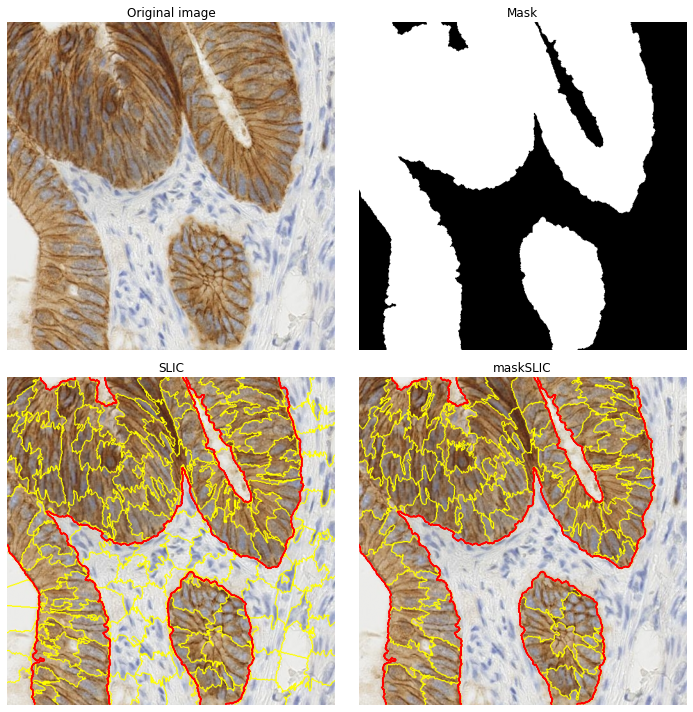

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
img = data.immunohistochemistry()

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()